In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#do plotting inline instead of in a seperate window.
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-Week3\\ex2\\ex2data2.txt",names =['exam1','exam2','Result'])
df.shape
df.head(2)

,exam1,exam2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1


In [3]:
#data2 = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-Week3\\ex2\\ex2data2.txt",names =['exam1','exam2','Result'])
#degree = 7 
#x1 = data2['exam1']  
#x2 = data2['exam2']
#data2.insert(3, 'Ones', 1)
#for i in range(1, degree):  
#    for j in range(0, i):
#        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

#data2.drop('exam1', axis=1, inplace=True)  
#data2.drop('exam2', axis=1, inplace=True)

#data2.head()

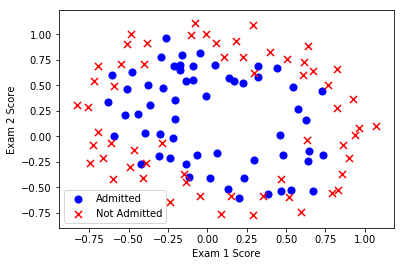

In [4]:
positive = df[df['Result'] == 1]
negative = df[df['Result'] == 0]

fig, ax = plt.subplots()
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [5]:
df['Name'] = 1
data = {'Bias':df['Name'],'exam1':df['exam1'],'exam2':df['exam2'],'Result':df['Result']}
df = pd.DataFrame(data)
X = df.as_matrix(columns = ['Bias','exam1','exam2'])
y = df.as_matrix(columns = ['Result'])





In [59]:
data = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-Week3\\ex2\\ex2data2.txt", header = None)
data = np.array(data)
X = data[:, [0,1]] 
y = data[:, [2]]
x_size = X[:,0].shape[0]

X1 = X[:,0]
X1 = X1.reshape(x_size, 1)

X2 = X[:,1]
X2 = X2.reshape(x_size, 1)

print(X1.size)
print(X2.size)

def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0], 1))
    for i in range(1, degree+1):
        for j in range (0, i+1):
            out1 = np.power(X1, (i-j))
            out2 = np.power(X2, j)
            out = np.concatenate((out,out1*out2),axis=1)
    return out

X = mapFeature(X1, X2)
initial_theta = np.zeros((X.shape[1],1))
print(initial_theta.shape)

118
118
(28, 1)


In [7]:
df2.head(3)

NameError: name 'df2' is not defined

In [18]:
def sigmoid(Z):
    return 1/(1+ np.exp(-Z))

In [19]:
def costFunction(Theta,X,y):
    m = y.size
    h = sigmoid(np.dot(X,Theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return J[0]

In [20]:
def computeCostReg(theta, lamb, X, y):
    m = len(y)
    normal_cost = costFunction(theta, X, y)
    reg_penalty = lamb/(2*m) * np.sum(theta[1:] * theta[1:])
    return normal_cost + reg_penalty

In [21]:
computeCostReg(initial_theta,1,X,y)

array([ 0.69314718])

In [22]:
def gradientStepReg(theta, lamb, X, y):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    step_vector = np.zeros_like(theta)
    J_history = np.zeros(1000000)
    for j in range(len(step_vector)):
        step_vector[j] = 1/m * np.sum((h - y) * X[j])
        
        if j != 0:
            step_vector[j] += lamb/m * theta[j]
    
    return step_vector.flatten()
import copy
def gradientDescent(Theta, lamb, x,y,num_iters=1000000):
    alpha=0.01
    m = y.size
    theta_for_reg = copy.deepcopy(Theta)
    theta_for_reg[0] = 0
    J_history = np.zeros(num_iters)
    for iter in  np.arange(num_iters):      
        h = sigmoid(np.dot(x,Theta))
        Theta = Theta - alpha*(1/m)* (x.T.dot(h-y)) -(lamb / m) * theta_for_reg
        J_history[iter]= computeCostReg(Theta, lamb, x, y)
    return Theta, J_history


def reg_grad(theta, x, y):
    h = sigmoid(np.dot(x,theta))
    m = len(y)
    lamb=1
    ans = ((1/m) * (h - y).T.dot(x)) + (lamb/m * theta.T)
    return ans.flatten()

In [23]:
NewTheta,Cost_J = gradientDescent(initial_theta,1,X,y)

#print('\nInitial thetas\n', reg_grad(initial_theta, X, y))

In [54]:
#print('\nInitial thetas\n',NewTheta)
#Newtheta =gradientStepReg(initial_theta,1,X,y)

In [25]:
print(computeCostReg(NewTheta,1,X,y))

[ 2.32245031]


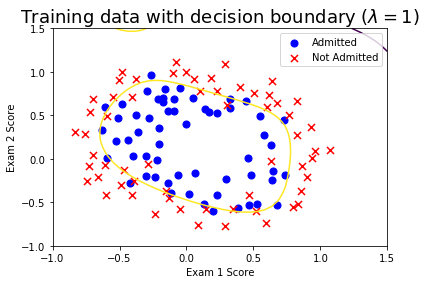

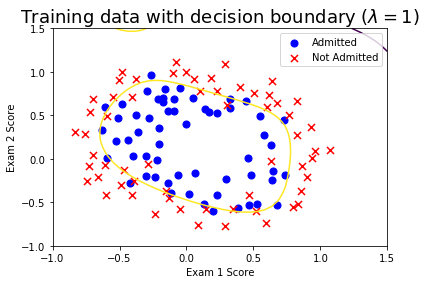

In [62]:
u1 = np.linspace(-1,1.5,50)
u2 = np.linspace(-1,1.5,50)

U1,U2 = np.meshgrid(u1,u2)
degree = 6

Z = np.zeros((len(u1),len(u2)))
k = 0
for i in range(0,degree+1):
        for j in range(0,i+1):
            Z = Z + (((U1 ** (i-j)) * (U2 ** j)) * NewTheta[k])
            k += 1

            

positive = df[df['Result'] == 1]
negative = df[df['Result'] == 0]

fig, ax = plt.subplots()
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')



ax.set_xlim(-1,1.5)
ax.set_ylim(-1,1.5)
ax.contour(U1,U2,Z,1)
ax.set_title(r'Training data with decision boundary ($\lambda = 1$)',fontsize=18)
ax.figure